# **TRAVEL INSURANCE PREDICTION**

Importing the necessary Python libraries and the dataset:

In [127]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

import pickle


In [128]:
df = pd.read_csv('TravelInsurancePrediction.csv')
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [129]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [130]:
df.tail()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1
1986,1986,34,Private Sector/Self Employed,Yes,500000,4,0,No,No,0


In [131]:
df.isna().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [132]:
df.dtypes

Unnamed: 0              int64
Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

In [133]:
df.columns

Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

The Unnamed column in this dataset is not useful, so I will remove it from the data

In [134]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In this dataset, the labels we want to predict are in the “TravelInsurance” column. The values in this column are mentioned as 0 and 1 where 0 means not bought and 1 means bought. For a better understanding when analyzing this data, I will convert 1 and 0 to purchased and not purchased:

In [135]:
df["TravelInsurance"] = df["TravelInsurance"].map({0: "Not Purchased", 1: "Purchased"})
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,Not Purchased
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,Not Purchased
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,Purchased
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,Not Purchased
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,Not Purchased
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,Purchased
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,Not Purchased
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,Not Purchased
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,Purchased


In [136]:
# Count the values in the 'TravelInsurance' column
df['TravelInsurance'].value_counts()

TravelInsurance
Not Purchased    1277
Purchased         710
Name: count, dtype: int64

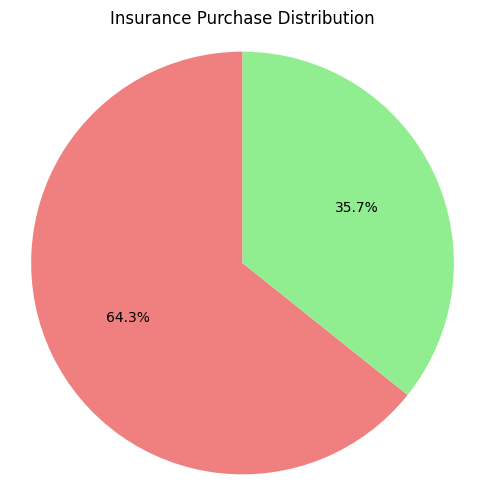

In [137]:
# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(df['TravelInsurance'].value_counts(), autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Insurance Purchase Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

The given data is unbalanced, so we need to convert it into a balanced dataset using SMOTE. 
This should be done after splitting the data into training and testing sets, and SMOTE should only be applied to the training data.

Now let’s start by looking at the age column to see how age affects the purchase of an insurance policy:

In [138]:
figure = px.histogram(df, x = "Age",color = "TravelInsurance",title = "Factors Affecting Purchase of Travel Insurance: Age")
figure.show()

According to the visualization above, individuals around the age of 34 are more likely to purchase an insurance policy, while those around 28 are much less likely to do so. 

Now, let's examine how a person's type of employment influences their likelihood of purchasing an insurance policy.

In [139]:
figure = px.histogram(df, x = "Employment Type",color = "TravelInsurance",title = "Factors Affecting Purchase of Travel Insurance: Employment Type")
figure.show()

According to the visualization above, people working in the private sector or who are self-employed are more likely to have an insurance policy.

 Now, let's examine how a person's annual income influences their decision to purchase an insurance policy.

In [140]:
figure = px.histogram(df, x = "AnnualIncome",color = "TravelInsurance",title = "Factors Affecting Purchase of Travel Insurance: Income")
figure.show()

The visualization above indicates that individuals earning more than 1,400,000 annually are more likely to purchase an insurance policy.

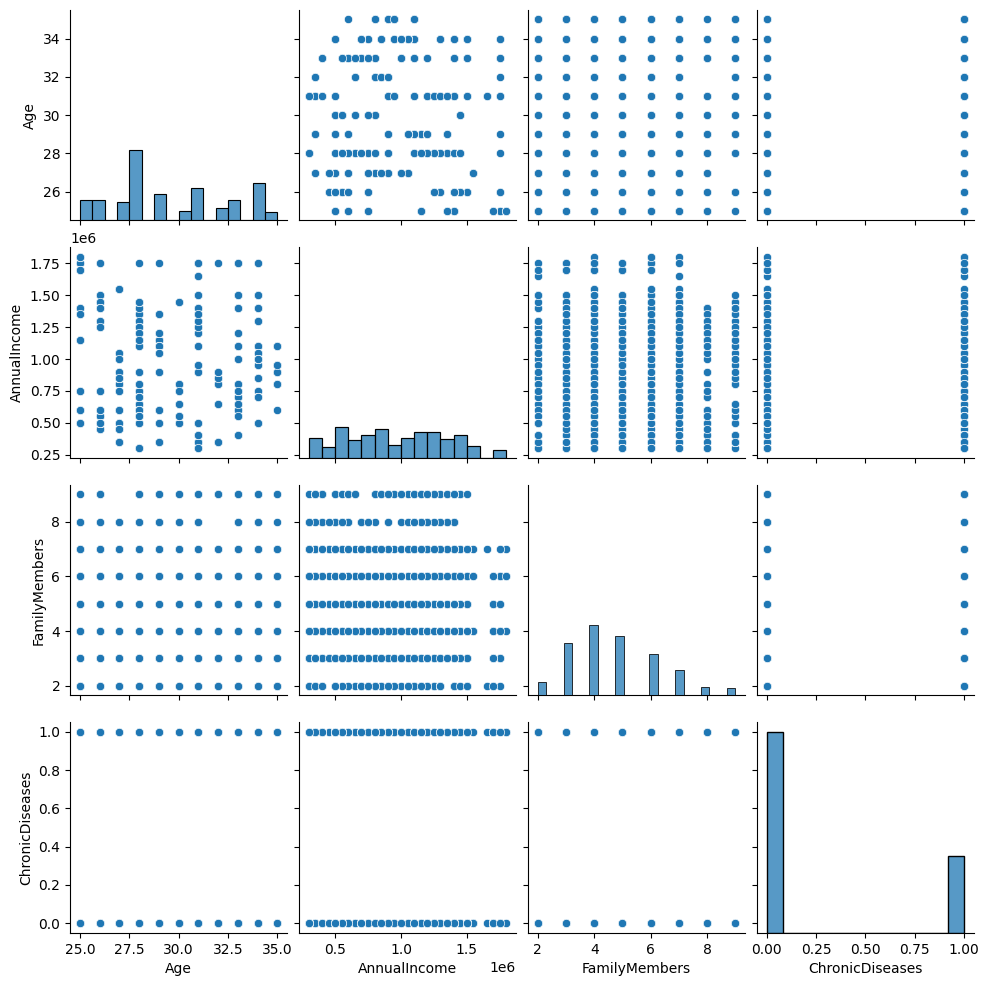

In [141]:
sns.pairplot(df)

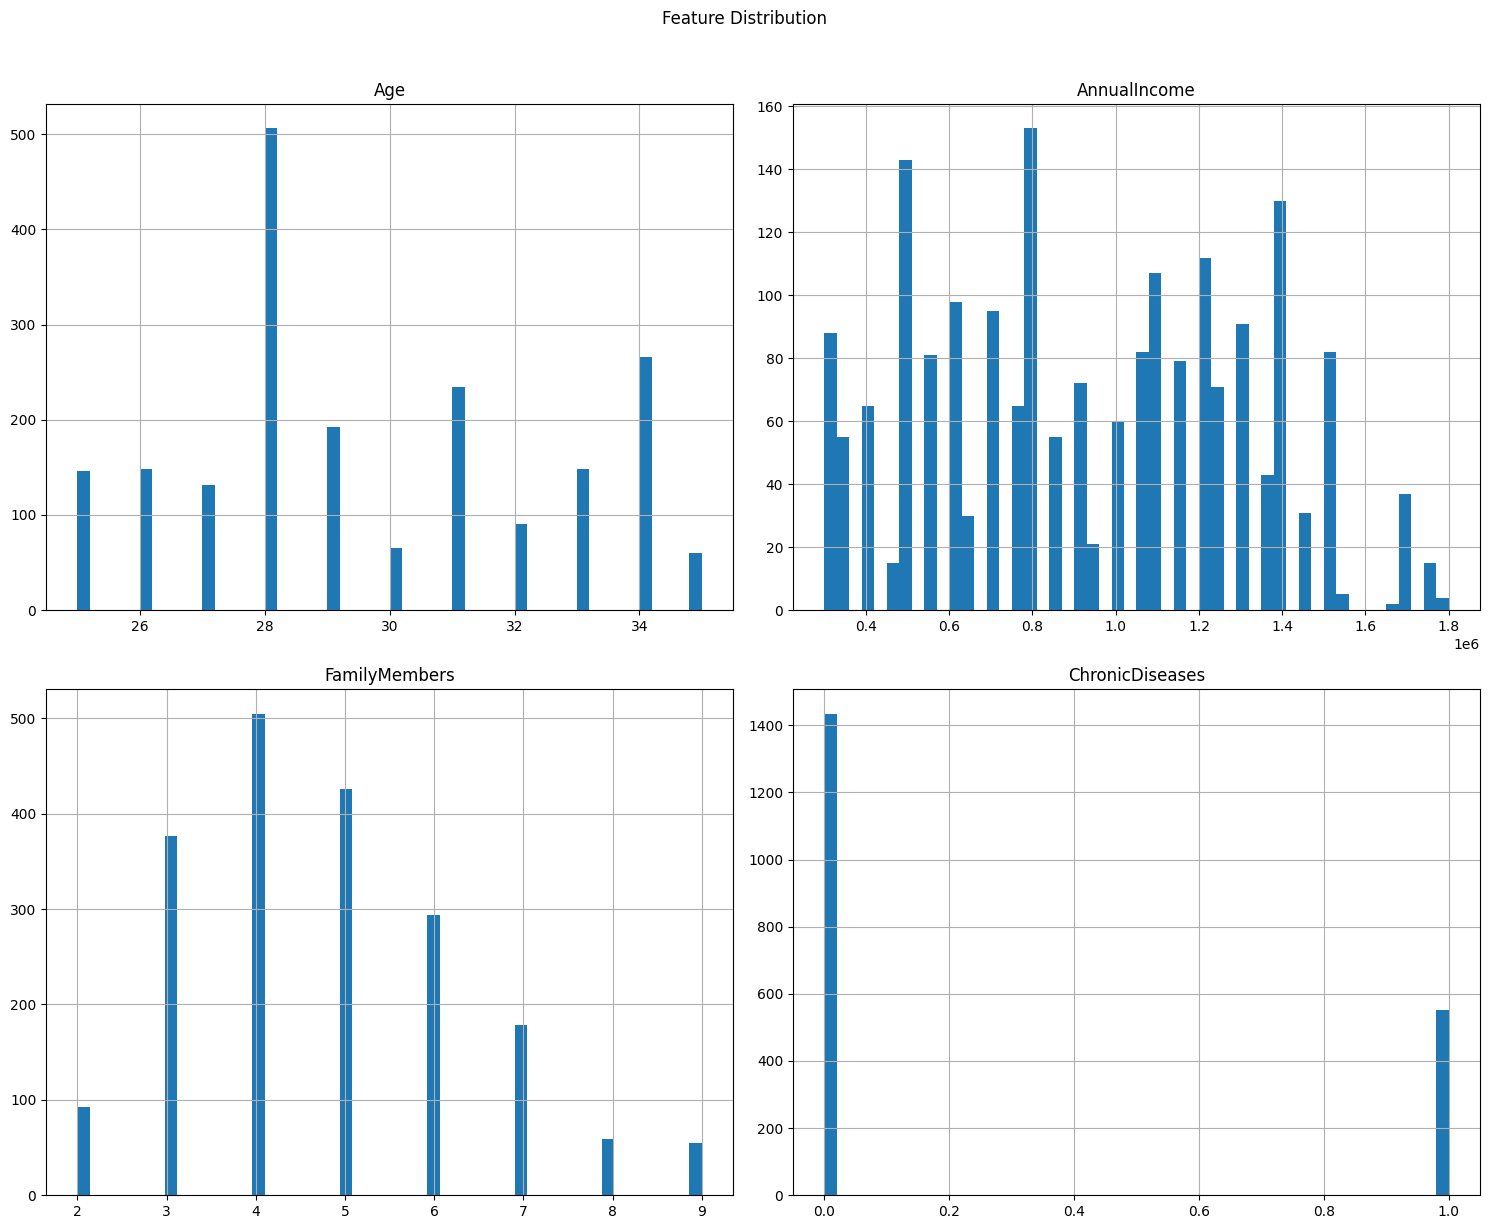

In [142]:
# feature distribution of the dataset

# plot all features present in the dataset
df.hist(bins=50,figsize=(15,12))

# add title with size and position
plt.suptitle('Feature Distribution',x=0.5,y=1.02,ha='center',fontsize='large')

# maintain perfect gaps between all plots
plt.tight_layout()


Since all columns are important for training the insurance prediction model, I will begin by converting all categorical variables into binary values (1 and 0).

In [143]:
df["Employment Type"] = df["Employment Type"].map({"Government Sector": 0, "Private Sector/Self Employed": 1})
df["GraduateOrNot"] = df["GraduateOrNot"].map({"No": 0, "Yes": 1})
df["FrequentFlyer"] = df["FrequentFlyer"].map({"No": 0, "Yes": 1})
df["EverTravelledAbroad"] = df["EverTravelledAbroad"].map({"No": 0, "Yes": 1})
df["TravelInsurance"] = df["TravelInsurance"].map({"Not Purchased":0, "Purchased":1})

In [144]:
df.corr()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
Age,1.000000,-0.115134,0.027125,-0.020101,0.027409,0.007359,-0.033159,-0.012779,0.061060
Employment Type,-0.115134,1.000000,-0.127133,0.349157,-0.003354,-0.011553,0.143790,0.181098,0.147847
GraduateOrNot,0.027125,-0.127133,1.000000,0.108066,0.021201,0.018811,-0.028120,0.062683,0.018934
AnnualIncome,-0.020101,0.349157,0.108066,1.000000,-0.015367,-0.001149,0.353087,0.486043,0.396763
FamilyMembers,0.027409,-0.003354,0.021201,-0.015367,1.000000,0.028209,-0.023775,-0.020755,0.079909
ChronicDiseases,0.007359,-0.011553,0.018811,-0.001149,0.028209,1.000000,-0.043720,0.021238,0.018190
FrequentFlyer,-0.033159,0.143790,-0.028120,0.353087,-0.023775,-0.043720,1.000000,0.277334,0.232103
EverTravelledAbroad,-0.012779,0.181098,0.062683,0.486043,-0.020755,0.021238,0.277334,1.000000,0.433183
TravelInsurance,0.061060,0.147847,0.018934,0.396763,0.079909,0.018190,0.232103,0.433183,1.000000


<Axes: >

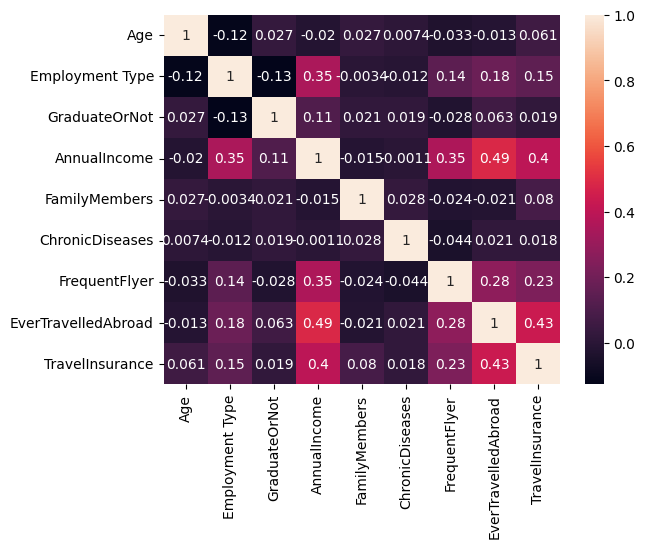

In [145]:
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'Correlation Plot of All Features')

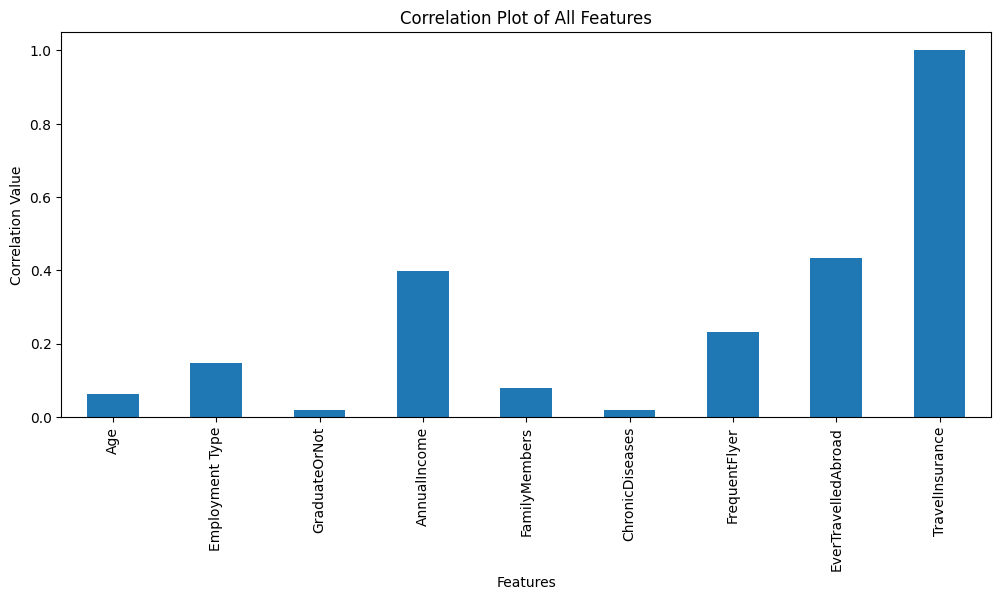

In [146]:
# checking all the features correlation with respect to target variable

plt.figure(figsize=(12,5))

df.corr()['TravelInsurance'][0:].plot(kind='bar')

plt.xlabel('Features')

plt.ylabel('Correlation Value')

# create a title for the plot
plt.title('Correlation Plot of All Features')

In [147]:
# checking the outliers in dataframe
def detect_Outliers(df):

    for feature in df.drop("TravelInsurance", axis=1).columns:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        outliers = df.loc[(df[feature] < lower_limit) | (df[feature] > upper_limit), feature]

        print(feature, outliers.shape[0])

detect_Outliers(df)

Age 0
Employment Type 0
GraduateOrNot 295
AnnualIncome 0
FamilyMembers 0
ChronicDiseases 0
FrequentFlyer 417
EverTravelledAbroad 380


In [148]:
x = df.iloc[:,:-1]
x

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,0,1,400000,6,1,0,0
1,31,1,1,1250000,7,0,0,0
2,34,1,1,500000,4,1,0,0
3,28,1,1,700000,3,1,0,0
4,28,1,1,700000,8,1,1,0
...,...,...,...,...,...,...,...,...
1982,33,1,1,1500000,4,0,1,1
1983,28,1,1,1750000,5,1,0,1
1984,28,1,1,1150000,6,1,0,0
1985,34,1,1,1000000,6,0,1,1


In [149]:
y = df.iloc[:,-1]
y

0       0
1       0
2       1
3       0
4       0
       ..
1982    1
1983    0
1984    0
1985    1
1986    0
Name: TravelInsurance, Length: 1987, dtype: int64

In [150]:
y.value_counts()

TravelInsurance
0    1277
1     710
Name: count, dtype: int64

Now let's split the data and train the model

In [151]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Step 1: Split your data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Apply SMOTE on the training data only
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
x_train_resampled, y_train_resampled = smk.fit_resample(x_train, y_train)


### Normalisation

In [152]:

#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()   #Object creation
scaler.fit(x_train_resampled)
x_train_resampled = scaler.fit_transform(x_train_resampled)
x_test = scaler.transform(x_test)


In [153]:
x_train_resampled.shape, x_test.shape

((2008, 8), (398, 8))

In [154]:
y_train_resampled.shape, y_test.shape

((2008,), (398,))

In [155]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

knn = KNeighborsClassifier()
sv = SVC()
nbs = GaussianNB()
rb = RandomForestClassifier()
ad = AdaBoostClassifier()
xg = XGBClassifier()
dtc = DecisionTreeClassifier()

models=[knn,sv,nbs,rb,ad,xg,dtc]
for model in models:
  print(model)
  model.fit(x_train_resampled,y_train_resampled)
  ypred=model.predict(x_test)
  print(classification_report(y_test,ypred))

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       256
           1       0.57      0.63      0.60       142

    accuracy                           0.70       398
   macro avg       0.68      0.68      0.68       398
weighted avg       0.71      0.70      0.70       398

SVC()
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       256
           1       0.70      0.58      0.64       142

    accuracy                           0.76       398
   macro avg       0.74      0.72      0.73       398
weighted avg       0.76      0.76      0.76       398

GaussianNB()
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       256
           1       0.65      0.56      0.60       142

    accuracy                           0.73       398
   macro avg       0.71      0.69      0.70       398
weighted avg       0.73      0.7

In [156]:

from sklearn.model_selection import GridSearchCV
# Define parameter grids for each model

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

In [157]:
#  Define models and run GridSearchCV:

# SVC tuning
svc = SVC()
grid_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_svc.fit(x_train_resampled, y_train_resampled)
print("Best parameters for SVC:", grid_svc.best_params_)

# AdaBoost tuning
ada = AdaBoostClassifier()
grid_ada = GridSearchCV(ada, param_grid_ada, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_ada.fit(x_train_resampled, y_train_resampled)
print("Best parameters for AdaBoost:", grid_ada.best_params_)

# XGB tuning
xgb = XGBClassifier(eval_metric='logloss')
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_xgb.fit(x_train_resampled, y_train_resampled)
print("Best parameters for XGB:", grid_xgb.best_params_)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for AdaBoost: {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 200}
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for XGB: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}


In [158]:


# Create models with best params
svc_best = SVC(**grid_svc.best_params_)
ada_best = AdaBoostClassifier(**grid_ada.best_params_)
xgb_best = XGBClassifier(**grid_xgb.best_params_, eval_metric='logloss')

# Train models on resampled training data
svc_best.fit(x_train_resampled, y_train_resampled)
ada_best.fit(x_train_resampled, y_train_resampled)
xgb_best.fit(x_train_resampled, y_train_resampled)

# Predict on test data
svc_pred = svc_best.predict(x_test)
ada_pred = ada_best.predict(x_test)
xgb_pred = xgb_best.predict(x_test)

# Print classification reports
print("SVC Classification Report:\n", classification_report(y_test, svc_pred))
print("AdaBoost Classification Report:\n", classification_report(y_test, ada_pred))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_pred))


SVC Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       256
           1       0.74      0.56      0.64       142

    accuracy                           0.77       398
   macro avg       0.76      0.73      0.74       398
weighted avg       0.77      0.77      0.77       398

AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       256
           1       0.66      0.61      0.63       142

    accuracy                           0.75       398
   macro avg       0.73      0.72      0.72       398
weighted avg       0.74      0.75      0.75       398

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       256
           1       0.63      0.63      0.63       142

    accuracy                           0.74       398
   macro avg       0.71      0.71  


- SVC has the highest overall accuracy and best weighted average F1-score.

- XGBoost performs slightly better than AdaBoost in terms of recall and F1-score for class 1.

- SVC shows better precision for identifying positive class (buyers), but slightly lower recall.



In [159]:
svc_model = SVC(C= 10, gamma= 'scale' ,kernel = 'rbf')
svc_model.fit(x_train_resampled,y_train_resampled)
ypred=svc_model.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       256
           1       0.74      0.56      0.64       142

    accuracy                           0.77       398
   macro avg       0.76      0.73      0.74       398
weighted avg       0.77      0.77      0.77       398



In [160]:
y_new = svc_model.predict([[33,1,1,1500000,4,0,1,1]])
y_new

array([1], dtype=int64)

In [161]:
test_sample = [[22, 0, 0, 300000, 5, 1, 0, 0]] 
prediction = svc_model.predict(test_sample)
print("Prediction:", prediction)


Prediction: [1]


The model gives a score of over 77% which is not bad for this kind of problem. So this is how you can train a machine learning model for the task of insurance prediction using Python.

In [162]:
pickle.dump(model, open('svc_model.sav', 'wb'))
pickle.dump(scaler, open('scaler.sav', 'wb'))